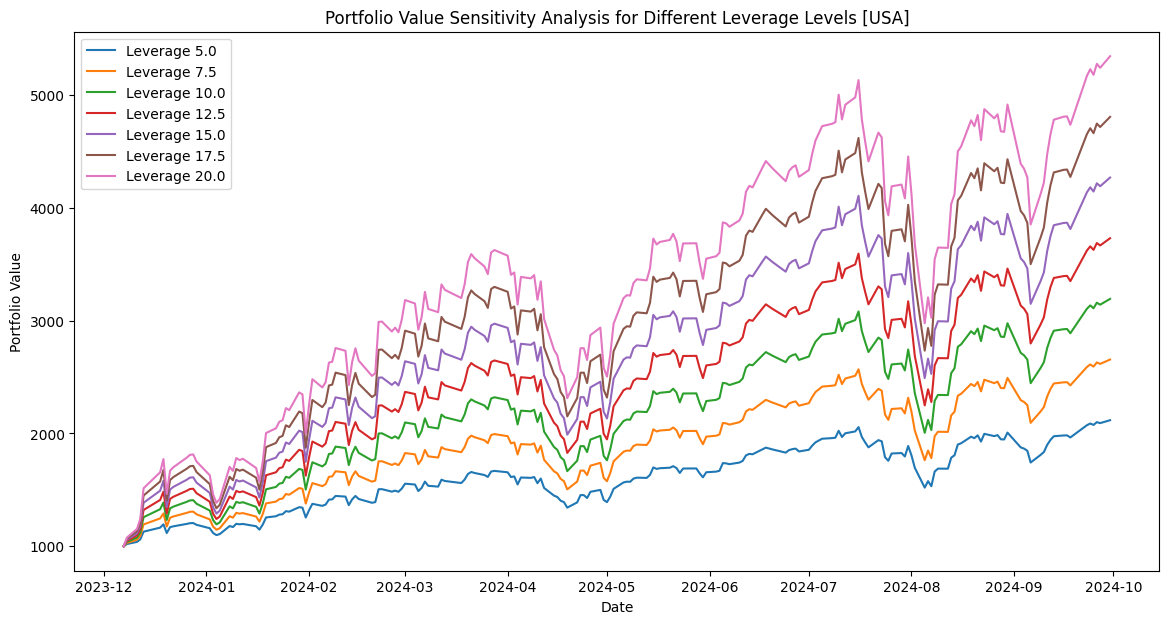

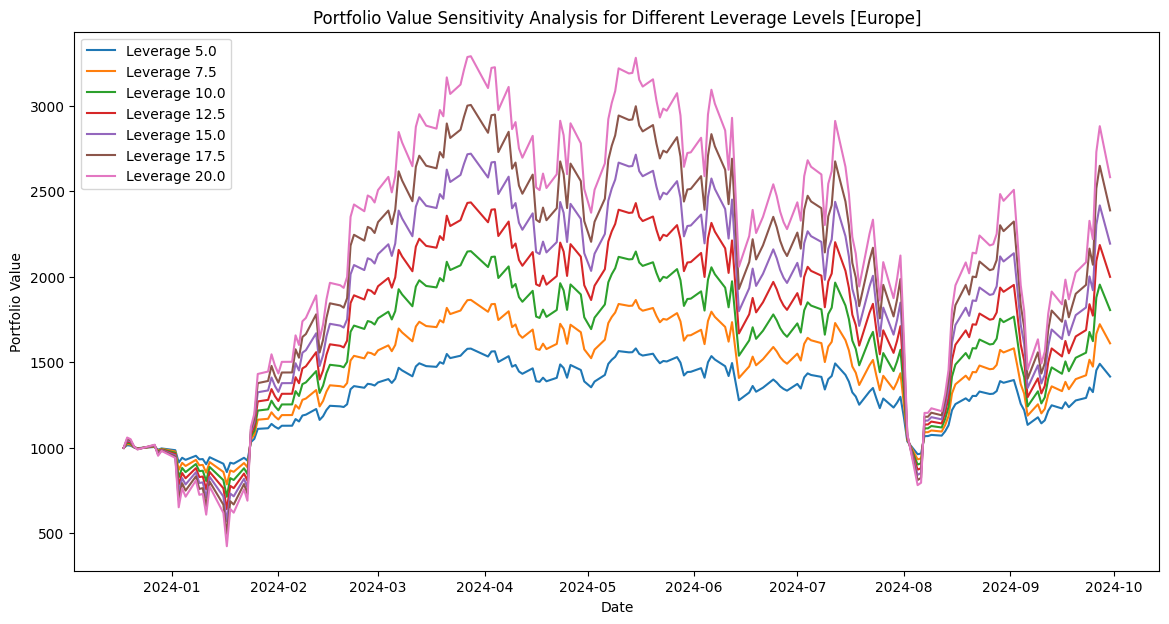

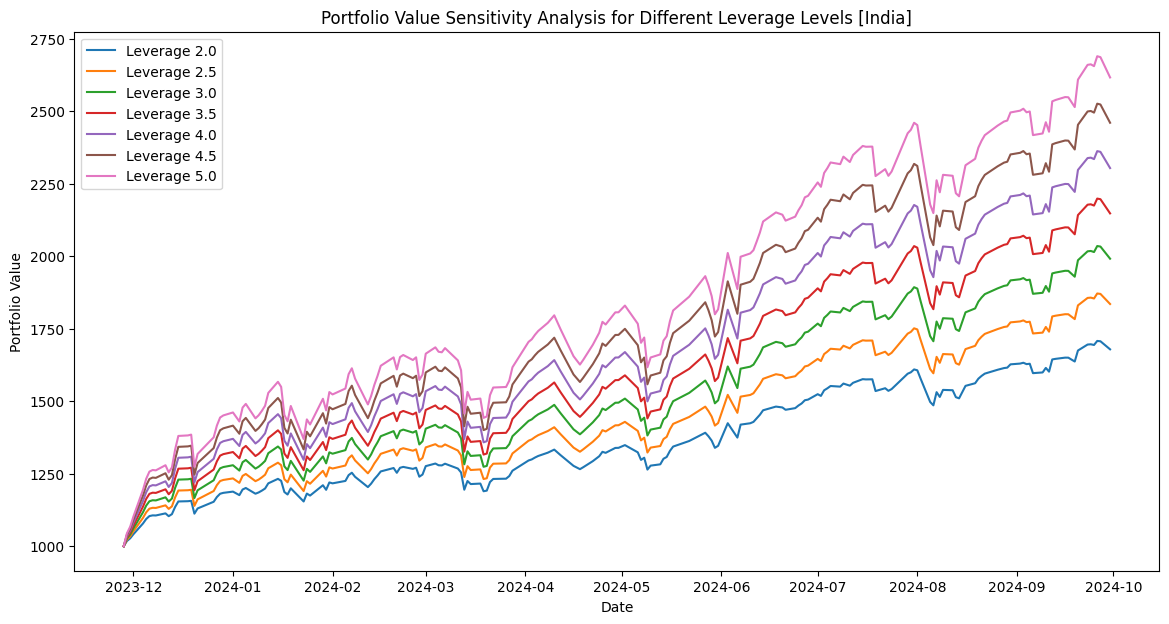

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_Model1 = pd.read_csv("../Data Model/US_Model.csv")
df_Model2 = pd.read_csv("../Data Model/EU_Model.csv")
df_Model3 = pd.read_csv("../Data Model/IN_Model.csv")
smaller_df1 = pd.read_csv("../Clean Data/Spread_Cleaned_US.csv")
smaller_df2 = pd.read_csv("../Clean Data/Spread_Cleaned_EU.csv")
smaller_df3 = pd.read_csv("../Clean Data/Spread_Cleaned_IN.csv")
df_Model1['Date'] = pd.to_datetime(df_Model1['Date'])
df_Model2['Date'] = pd.to_datetime(df_Model2['Date'])
df_Model3['Date'] = pd.to_datetime(df_Model3['Date'])
smaller_df1['Date'] = pd.to_datetime(smaller_df1['Date'])
smaller_df2['Date'] = pd.to_datetime(smaller_df2['Date'])
smaller_df3['Date'] = pd.to_datetime(smaller_df3['Date'])
joined_df1 = pd.merge(df_Model1, smaller_df1, on='Date', suffixes=('', '_smaller'))
joined_df1 = joined_df1.drop(columns=['PX_LAST_smaller', 'PX_VOLUME_x', 'PX_VOLUME_y', 'VIX_smaller', 'SOFR3M_smaller'])
joined_df2 = pd.merge(df_Model2, smaller_df2, on='Date', suffixes=('', '_smaller'))
joined_df2 = joined_df2.drop(columns=['PX_LAST_smaller', 'PX_VOLUME_x', 'PX_VOLUME_y', 'VSTOXX_smaller', 'EURIBOR3M_smaller'])
joined_df3 = pd.merge(df_Model3, smaller_df3, on='Date', suffixes=('', '_smaller'))
joined_df3 = joined_df3.drop(columns=['PX_LAST_smaller', 'PX_VOLUME_x', 'PX_VOLUME_y', 'NIFVIX_smaller', 'IN003M_smaller'])

# Set up leverage range for sensitivity analysis
min_leverage1 = 5
max_leverage1 = 20
min_leverage2 = 5
max_leverage2 = 20
min_leverage3 = 2
max_leverage3 = 5


initial_investment = 1000

joined_df1['CFD_Ask'] = joined_df1['PX_LAST'] + (joined_df1['Theoretical_Spread'] / 2)
joined_df1['CFD_Bid'] = joined_df1['PX_LAST'] - (joined_df1['Theoretical_Spread'] / 2)
joined_df2['CFD_Ask'] = joined_df2['PX_LAST'] + (joined_df2['Theoretical_Spread'] / 2)
joined_df2['CFD_Bid'] = joined_df2['PX_LAST'] - (joined_df2['Theoretical_Spread'] / 2)
joined_df3['CFD_Ask'] = joined_df3['PX_LAST'] + (joined_df3['Theoretical_Spread'] / 2)
joined_df3['CFD_Bid'] = joined_df3['PX_LAST'] - (joined_df3['Theoretical_Spread'] / 2)

sensitivity_results_us = pd.DataFrame()
sensitivity_results_eu = pd.DataFrame()
sensitivity_results_in = pd.DataFrame()

for leverage in np.arange(min_leverage1, max_leverage1 + 2.5, 2.5):
    leverage = round(leverage, 1)

    joined_df1[f'CFD_Units_{leverage}'] = (initial_investment * leverage) / joined_df1['CFD_Ask'].iloc[0]
    joined_df1[f'Price_Delta_{leverage}'] = (
        joined_df1[f'CFD_Units_{leverage}'] * (joined_df1['CFD_Bid'] - joined_df1['CFD_Bid'].shift(1)).fillna(0)
    )
    joined_df1[f'Cost_of_Carry_{leverage}'] = initial_investment * (leverage - 1) * joined_df1['Daily_STIR']
    joined_df1.loc[0, f'Cost_of_Carry_{leverage}'] = 0
    joined_df1[f'Cumulative_Cost_{leverage}'] = joined_df1[f'Cost_of_Carry_{leverage}'].cumsum()
    joined_df1.loc[0, f'Cumulative_Cost_{leverage}'] = 0

    joined_df1[f'Portfolio_Value_{leverage}'] = (
        initial_investment + joined_df1[f'Price_Delta_{leverage}'].cumsum() - joined_df1[f'Cumulative_Cost_{leverage}']
    )

    # Store the portfolio values and leverage in the sensitivity results DataFrame
    sensitivity_results_us[f'Portfolio_Value_{leverage}'] = joined_df1[f'Portfolio_Value_{leverage}']

for leverage in np.arange(min_leverage2, max_leverage2 + 2.5, 2.5):
    leverage = round(leverage, 1)

    joined_df2[f'CFD_Units_{leverage}'] = (initial_investment * leverage) / joined_df2['CFD_Ask'].iloc[0]
    joined_df2[f'Price_Delta_{leverage}'] = (
        joined_df2[f'CFD_Units_{leverage}'] * (joined_df2['CFD_Bid'] - joined_df2['CFD_Bid'].shift(1)).fillna(0)
    )
    joined_df2[f'Cost_of_Carry_{leverage}'] = initial_investment * (leverage - 1) * joined_df2['Daily_STIR']
    joined_df2.loc[0, f'Cost_of_Carry_{leverage}'] = 0
    joined_df2[f'Cumulative_Cost_{leverage}'] = joined_df2[f'Cost_of_Carry_{leverage}'].cumsum()
    joined_df2.loc[0, f'Cumulative_Cost_{leverage}'] = 0

    joined_df2[f'Portfolio_Value_{leverage}'] = (
        initial_investment + joined_df2[f'Price_Delta_{leverage}'].cumsum() - joined_df2[f'Cumulative_Cost_{leverage}']
    )
    # Store the portfolio values and leverage in the sensitivity results DataFrame
    sensitivity_results_eu[f'Portfolio_Value_{leverage}'] = joined_df2[f'Portfolio_Value_{leverage}']

for leverage in np.arange(min_leverage3, max_leverage3 + 0.5, 0.5):
    leverage = round(leverage, 1)

    joined_df3[f'CFD_Units_{leverage}'] = (initial_investment * leverage) / joined_df3['CFD_Ask'].iloc[0]
    joined_df3[f'Price_Delta_{leverage}'] = (
        joined_df3[f'CFD_Units_{leverage}'] * (joined_df3['CFD_Bid'] - joined_df3['CFD_Bid'].shift(1)).fillna(0)
    )
    joined_df3[f'Cost_of_Carry_{leverage}'] = initial_investment * (leverage - 1) * joined_df3['Daily_STIR']
    joined_df3.loc[0, f'Cost_of_Carry_{leverage}'] = 0
    joined_df3[f'Cumulative_Cost_{leverage}'] = joined_df3[f'Cost_of_Carry_{leverage}'].cumsum()
    joined_df3.loc[0, f'Cumulative_Cost_{leverage}'] = 0

    joined_df3[f'Portfolio_Value_{leverage}'] = (
        initial_investment + joined_df3[f'Price_Delta_{leverage}'].cumsum() - joined_df3[f'Cumulative_Cost_{leverage}']
    )


    # Store the portfolio values and leverage in the sensitivity results DataFrame
    sensitivity_results_in[f'Portfolio_Value_{leverage}'] = joined_df3[f'Portfolio_Value_{leverage}']


sensitivity_results_us['Date'] = joined_df1['Date']
sensitivity_results_eu['Date'] = joined_df2['Date']
sensitivity_results_in['Date'] = joined_df3['Date']


plt.figure(figsize=(14, 7))
for leverage in np.arange(min_leverage1, max_leverage1 + 2.5, 2.5):
    leverage = round(leverage, 1)
    plt.plot(sensitivity_results_us['Date'], sensitivity_results_us[f'Portfolio_Value_{leverage}'], label=f'Leverage {leverage}')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Sensitivity Analysis for Different Leverage Levels [USA]')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
for leverage in np.arange(min_leverage2, max_leverage2 + 2.5, 2.5):
    leverage = round(leverage, 1)
    plt.plot(sensitivity_results_eu['Date'], sensitivity_results_eu[f'Portfolio_Value_{leverage}'], label=f'Leverage {leverage}')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Sensitivity Analysis for Different Leverage Levels [Europe]')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
for leverage in np.arange(min_leverage3, max_leverage3 + 0.5, 0.5):
    leverage = round(leverage, 1)
    plt.plot(sensitivity_results_in['Date'], sensitivity_results_in[f'Portfolio_Value_{leverage}'], label=f'Leverage {leverage}')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Sensitivity Analysis for Different Leverage Levels [India]')
plt.legend()
plt.show()


In [34]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
sensitivity_results_long1 = pd.melt(
    sensitivity_results_us,
    id_vars=['Date'],
    var_name='Leverage',
    value_name='Portfolio_Value'
)

sensitivity_results_long2 = pd.melt(
    sensitivity_results_eu,
    id_vars=['Date'],
    var_name='Leverage',
    value_name='Portfolio_Value'
)

sensitivity_results_long3 = pd.melt(
    sensitivity_results_in,
    id_vars=['Date'],
    var_name='Leverage',
    value_name='Portfolio_Value'
)

# Extract the leverage level from the 'Leverage' column
sensitivity_results_long1['Leverage'] = sensitivity_results_long1['Leverage'].str.extract('(\d+)').astype(int)
sensitivity_results_long2['Leverage'] = sensitivity_results_long2['Leverage'].str.extract('(\d+)').astype(int)
sensitivity_results_long3['Leverage'] = sensitivity_results_long3['Leverage'].str.extract('(\d+)').astype(int)

# Fit an OLS model
model1 = ols('Portfolio_Value ~ Leverage', data=sensitivity_results_long1).fit()
model2 = ols('Portfolio_Value ~ Leverage', data=sensitivity_results_long2).fit()
model3 = ols('Portfolio_Value ~ Leverage', data=sensitivity_results_long3).fit()

anova_results1 = anova_lm(model1)
anova_results2 = anova_lm(model2)
anova_results3 = anova_lm(model3)
print("USA")
print(anova_results1)
print("Europe")
print(anova_results2)
print("India")
print(anova_results3)

USA
              df        sum_sq       mean_sq           F         PR(>F)
Leverage     1.0  4.779030e+08  4.779030e+08  917.127493  7.977221e-155
Residual  1377.0  7.175364e+08  5.210867e+05         NaN            NaN
Europe
              df        sum_sq       mean_sq           F        PR(>F)
Leverage     1.0  1.154209e+08  1.154209e+08  454.816641  1.975739e-87
Residual  1377.0  3.494477e+08  2.537747e+05         NaN           NaN
India
              df        sum_sq       mean_sq           F        PR(>F)
Leverage     1.0  3.459018e+07  3.459018e+07  343.005301  3.491270e-68
Residual  1307.0  1.318037e+08  1.008444e+05         NaN           NaN


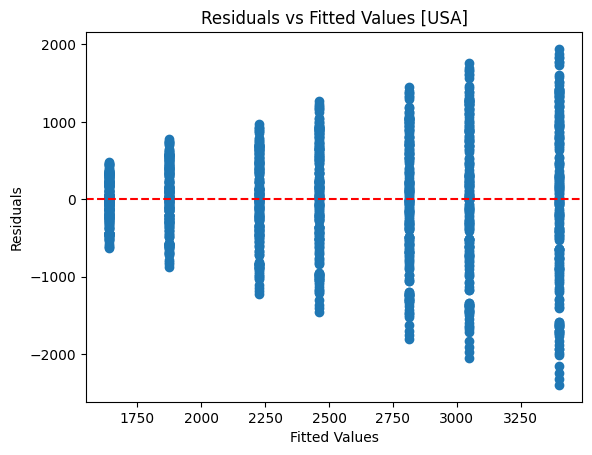

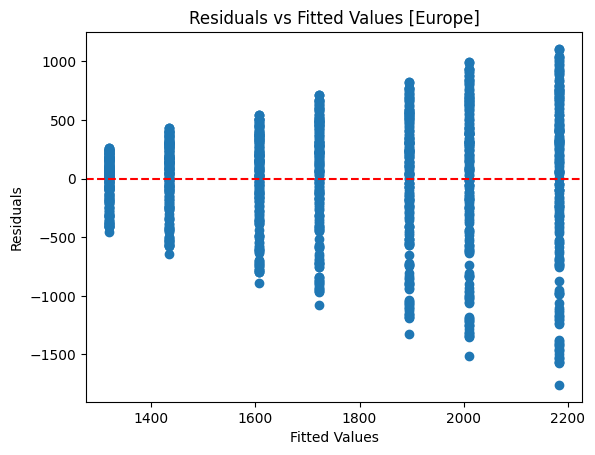

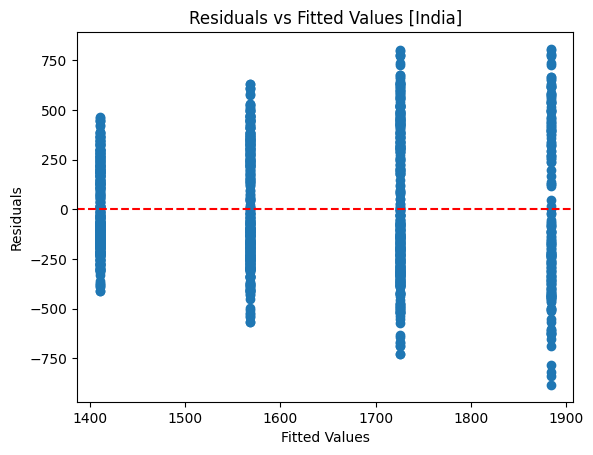

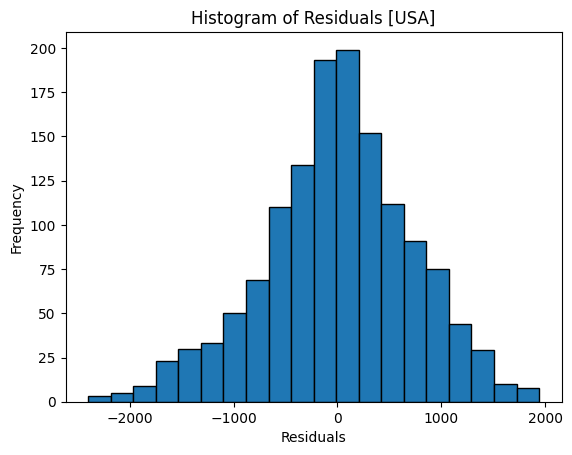

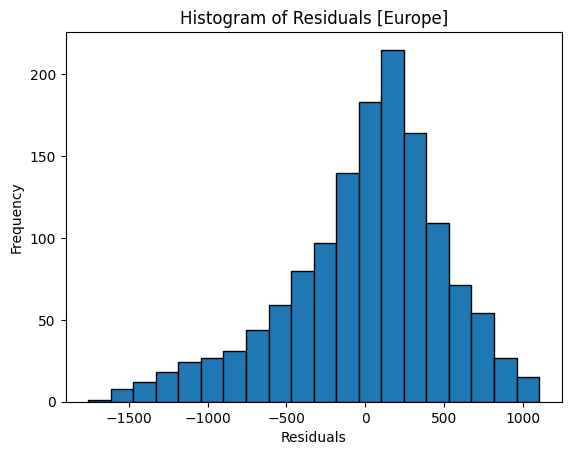

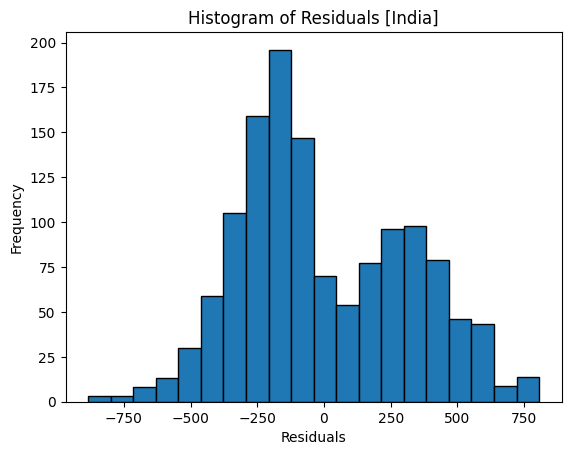

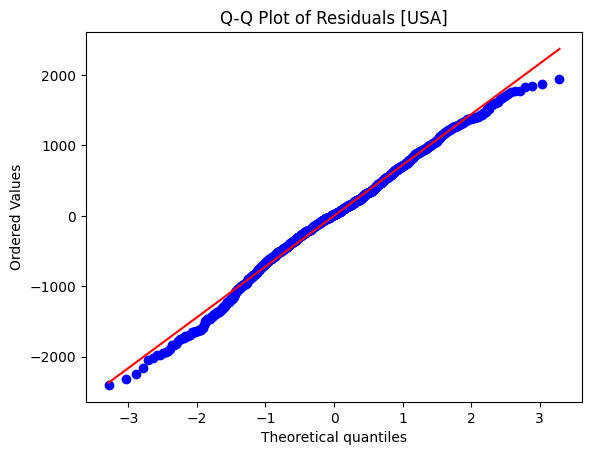

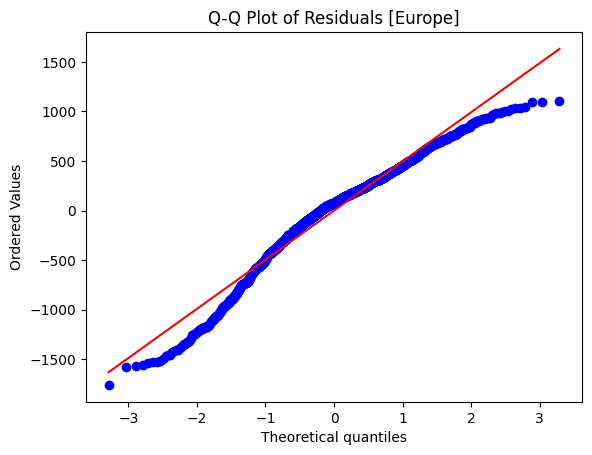

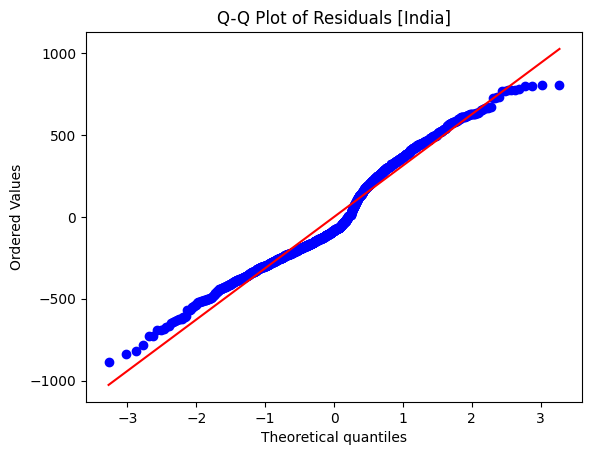

In [41]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

residuals_us = model1.resid
residuals_eu = model2.resid
residuals_in = model3.resid


fitted_values1 = model1.fittedvalues
fitted_values2 = model2.fittedvalues
fitted_values3 = model3.fittedvalues

plt.scatter(fitted_values1, residuals_us)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values [USA]')
plt.show()

plt.scatter(fitted_values2, residuals_eu)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values [Europe]')
plt.show()

plt.scatter(fitted_values3, residuals_in)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values [India]')
plt.show()

plt.hist(residuals_us, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals [USA]')
plt.show()

plt.hist(residuals_eu, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals [Europe]')
plt.show()

plt.hist(residuals_in, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals [India]')
plt.show()

stats.probplot(residuals_us, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals [USA]')
plt.show()

stats.probplot(residuals_eu, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals [Europe]')
plt.show()

stats.probplot(residuals_in, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals [India]')
plt.show()

In [31]:
from scipy.stats import levene
stat1, p_value1 = levene(sensitivity_results_long1['Portfolio_Value'],sensitivity_results_long1['Leverage'])
stat2, p_value2 = levene(sensitivity_results_long2['Portfolio_Value'],sensitivity_results_long2['Leverage'])
stat3, p_value3 = levene(sensitivity_results_long3['Portfolio_Value'],sensitivity_results_long3['Leverage'])

Levene = {
    'Metric': ["Levene's test Statistic", "Levene's test p- value"],
    'USA' : [stat1, p_value1],
    'Europe' : [stat2, p_value2],
    'India' : [stat3, p_value3]
}
levene_df = pd.DataFrame(Levene)
print(levene_df.to_csv(sep='\t', index=False, float_format='%.4f'))

Metric	USA	Europe	India
Levene's test Statistic	2353.7570	2609.8856	1927.4447
Levene's test p- value	0.0000	0.0000	0.0000



In [49]:
def welchs_anova(data, value_col, group_col):
    groups = data[group_col].unique()
    group_data = [data[data[group_col] == g][value_col] for g in groups]
    f_stat, p_value = stats.f_oneway(*group_data)
    return f_stat, p_value

# Perform Welch's ANOVA for USA, Europe, and India
f_stat_usa, p_value_usa = welchs_anova(sensitivity_results_long1, 'Portfolio_Value', 'Leverage')
f_stat_eu, p_value_eu = welchs_anova(sensitivity_results_long2, 'Portfolio_Value', 'Leverage')
f_stat_in, p_value_in = welchs_anova(sensitivity_results_long3, 'Portfolio_Value', 'Leverage')

# Display results
results = pd.DataFrame({
    'Metric': ["Welch's ANOVA F-Statistic", "Welch's ANOVA p-value"],
    'USA' : [f_stat_usa, p_value_usa],
    'Europe' : [f_stat_eu, p_value_eu],
    'India' : [f_stat_in, p_value_in]
})

print(results.to_csv(sep='\t', index=False, float_format='%.4f'))

Metric	USA	Europe	India
Welch's ANOVA F-Statistic	152.9220	75.7738	114.7911
Welch's ANOVA p-value	0.0000	0.0000	0.0000

